In [ ]:
#||||||||||||||||||||||||||||||CAR PRICE PREDICTION SYSTEM|||||||||||||||||||||||||||||||
# General libraries
import pandas as pd
import numpy as np


# Preprocessing
from sklearn.preprocessing import OneHotEncoder

# Model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz, plot_tree
import graphviz



# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
def preprocess_data(data):
    """
    Preprocess the dataset by encoding categorical features and combining them with numerical features.
    Handles missing values and ensures the dataset is ready for model training.
    """
    # Define categorical and numerical features
    categorical_features = ['city', 'make', 'model', 'transmission', 'fuel type', 'color', 'registered']
    numerical_features = ['year', 'Engine Size', 'mileage']
    target = 'price'

    # Handle missing values in categorical features
    for col in categorical_features:
        data[col].fillna("Unknown", inplace=True)

    # Handle missing values in numerical features
    for col in numerical_features:
        data[col].fillna(data[col].median(), inplace=True)

    # Drop rows where the target variable (price) is missing
    data = data.dropna(subset=[target])

    # Define OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Dense output, avoids dummy variable trap
    encoded_data = encoder.fit_transform(data[categorical_features])
    encoded_columns = encoder.get_feature_names_out(categorical_features)

    # Combine numerical and encoded categorical data
    X = np.hstack((encoded_data, data[numerical_features].values))
    feature_names = list(encoded_columns) + numerical_features
    y = data[target]

    return X, y, feature_names, encoder

# Load the dataset
file_path = "C:/Users/HP/OneDrive/Desktop/ai/raw_data.csv"
data = pd.read_csv(file_path)

# Preprocess the data
X, y, feature_names, encoder = preprocess_data(data)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\HP\AppData\Local\Temp\ipykernel_5080\1525147436.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna("Unknown", inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_5080\1525147436.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [6]:


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),    
    "Random Forest Regressor" : RandomForestRegressor(
    random_state=42,
    n_estimators=20,       # Fewer trees
    max_depth=10,          # Limit tree depth
    max_features="sqrt",   # Fewer features per split
    max_samples=0.8,       # Use 80% of the data
    n_jobs=-1              # Utilize all CPU cores
)}
  

# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R² Score

    # Store results
    results[model_name] = {
        "model": model,
        "rmse": rmse,
        "mse": mse,
        "r2": r2,
        "y_pred": y_pred
    }

    # Print evaluation metrics
    print(f"\n{model_name} Evaluation:")
    print(f"RMSE: {rmse:,.2f}")
    print(f"MSE: {mse:,.2f}")
    print(f"R² Score: {r2:.4f}")

# Compare and identify the best model
best_model = max(results.items(), key=lambda item: item[1]['r2'])
print(f"\nBest Model: {best_model[0]} with R² Score: {best_model[1]['r2']:.4f}")



Linear Regression Evaluation:
RMSE: 3,028,489.19
MSE: 9,171,746,793,542.49
R² Score: 0.6794

Decision Tree Regressor Evaluation:
RMSE: 2,323,460.49
MSE: 5,398,468,648,865.55
R² Score: 0.8113

Random Forest Regressor Evaluation:
RMSE: 3,819,793.94
MSE: 14,590,825,752,122.53
R² Score: 0.4900

Best Model: Decision Tree Regressor with R² Score: 0.8113


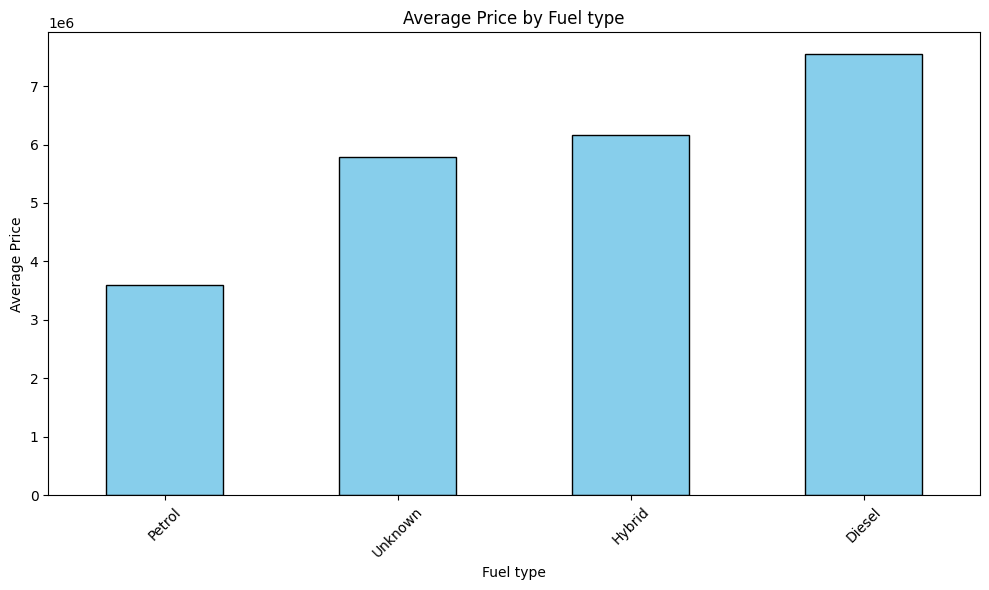

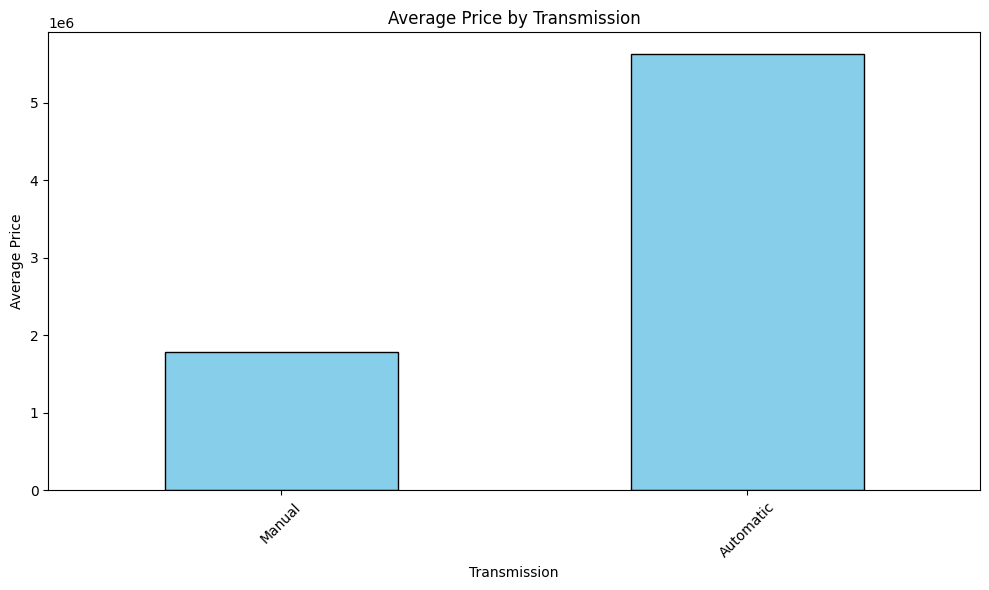

In [18]:
def plot_bar_graphs(data, categorical_features):
    """Plot bar graphs for average price by categorical features."""
    for feature in categorical_features:
        if feature in data.columns:
            plt.figure(figsize=(10, 6))
            avg_prices = data.groupby(feature)['price'].mean().sort_values()
            avg_prices.plot(kind='bar', color='skyblue', edgecolor='black')
            plt.title(f"Average Price by {feature.capitalize()}")
            plt.xlabel(feature.capitalize())
            plt.ylabel("Average Price")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# Call the function for bar graphs
plot_bar_graphs(data, ['fuel type', 'transmission'])


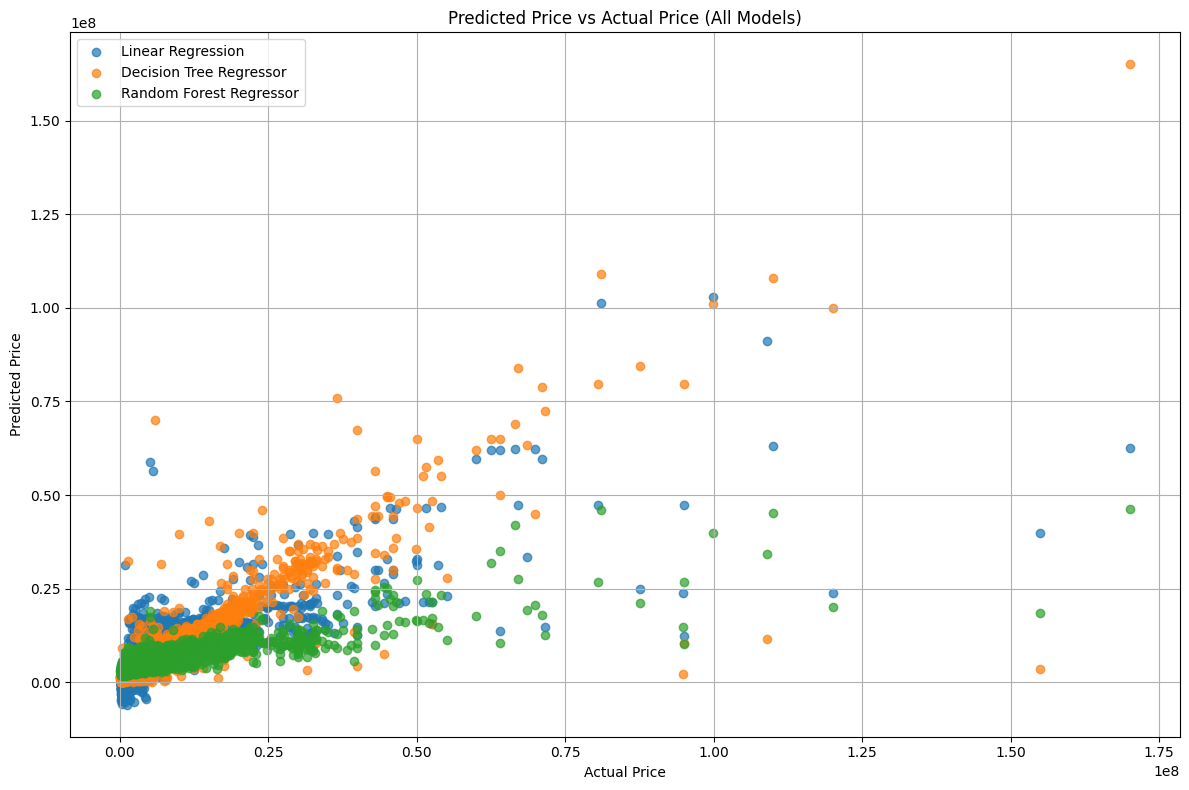

In [7]:
def plot_scatter_actual_vs_predicted(results, y_test):
    """Plot scatter plot for predicted vs actual prices for all models."""
    plt.figure(figsize=(12, 8))
    for model_name, result in results.items():
        plt.scatter(y_test, result["y_pred"], label=model_name, alpha=0.7)
    plt.title("Predicted Price vs Actual Price (All Models)")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Call the scatter plot function
plot_scatter_actual_vs_predicted(results, y_test)


Dataset shape after cleaning: (77295, 12)
First few rows:
0    2870000.0
1     995000.0
2    3585000.0
3    2250000.0
4    4850000.0
Name: price, dtype: float64


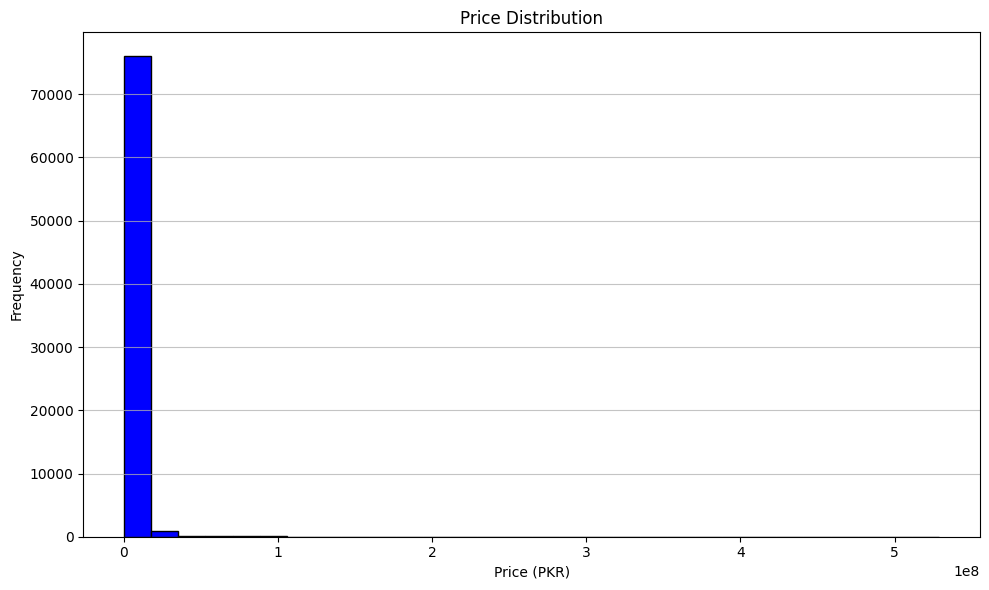

In [9]:


# Load the dataset
file_path = "raw_data.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Ensure the 'price' column is present
if 'price' not in data.columns:
    raise KeyError("The dataset does not contain a 'price' column.")

# Define and use the plot_price_distribution function
def plot_price_distribution(data):
    """
    Plots a histogram for the price distribution.
    Parameters:
    - data: The dataset containing the 'price' column.
    """
    # Drop missing or non-numeric values
    data = data[data['price'].notnull()]  # Remove rows with NaN in 'price'
    data = data[data['price'].apply(lambda x: isinstance(x, (int, float)))]  # Keep only numeric prices

    # Debug: Check the cleaned dataset
    print(f"Dataset shape after cleaning: {data.shape}")
    print(f"First few rows:\n{data['price'].head()}")

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data['price'], bins=30, color='blue', edgecolor='black')
    plt.title("Price Distribution")
    plt.xlabel("Price (PKR)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

# Visualize the price distribution
plot_price_distribution(data)


Decision Tree graph saved as PNG at: C:\Users\HP\OneDrive\Desktop\ai\decision_tree_graph.png


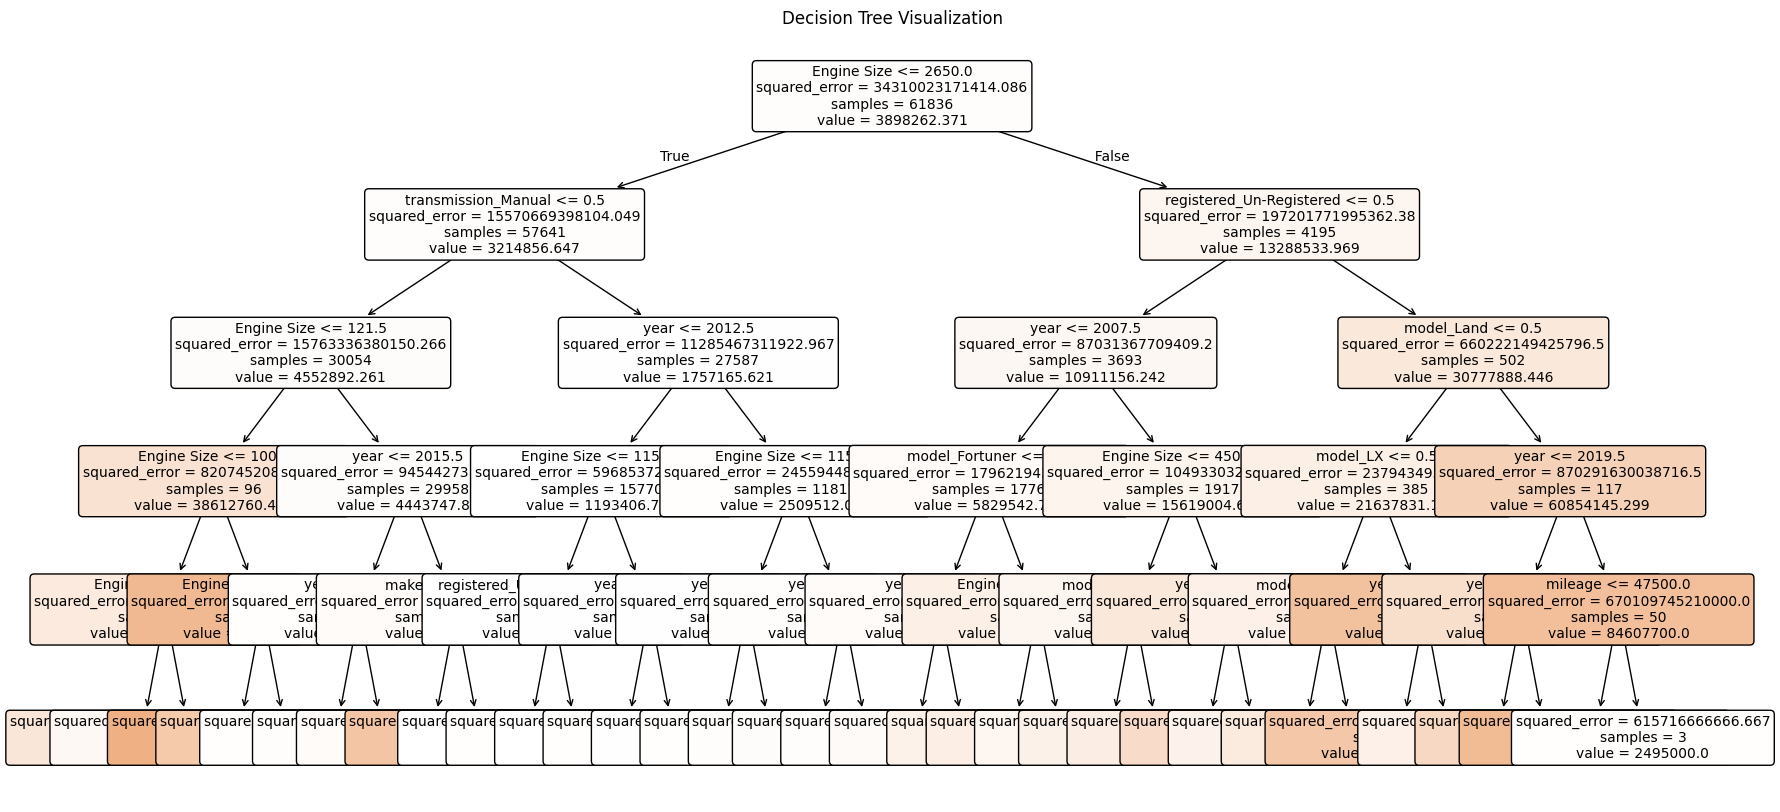

In [10]:
import os

# Step 1: Configure Graphviz PATH
os.environ["PATH"] += os.pathsep + r"C:\Users\HP\OneDrive\Desktop\ai\Graphviz\bin"

# Step 2: Load the dataset (replace with your dataset)
file_path = r"C:\Users\HP\OneDrive\Desktop\ai\raw_data.csv"
car_price_data = pd.read_csv(file_path)

# Step 3: Handle missing values in the target variable

car_price_data = car_price_data.dropna(subset=['price'])  # Drop rows with missing prices

# Step 4: Preprocess the data (one-hot encoding)
car_price_data = pd.get_dummies(
    car_price_data,
    columns=['city', 'make', 'model', 'transmission', 'fuel type', 'color', 'registered'],
    drop_first=True
)

# Separate features (X) and target (y)
X = car_price_data.drop(['price', 'Reference'], axis=1)
y = car_price_data['price']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

# Step 7: Save and render the Decision Tree graph using Graphviz
def save_decision_tree_graph(model, feature_names, output_path):
    """
    Save the Decision Tree graph as PNG using Graphviz.

    Parameters:
    - model: Trained DecisionTreeRegressor or DecisionTreeClassifier.
    - feature_names: List of feature names used in training.
    - output_path: Path where the PNG file will be saved.
    """
    # Export the Decision Tree to DOT format
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=feature_names,
        filled=True,
        rounded=True,
        special_characters=True
    )
    
    # Render the DOT data into a PNG file using Graphviz
    graph = graphviz.Source(dot_data)
    graph.format = "png"
    graph.render(output_path, cleanup=True)
    print(f"Decision Tree graph saved as PNG at: {output_path}.png")

# Save the graph as PNG
output_path = r"C:\Users\HP\OneDrive\Desktop\ai\decision_tree_graph"
save_decision_tree_graph(regressor, X_train.columns, output_path)

# Step 8: (Optional) Plot the Decision Tree inline using Matplotlib
plt.figure(figsize=(20, 10))
plot_tree(
    regressor,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


In [11]:
def predict_user_input(feature_names, encoder, results, y_test, simulate=False):
    if simulate:
        user_data = {
            "city": "Lahore",
            "make": "Toyota",
            "model": "Corolla",
            "transmission": "Automatic",
            "fuel type": "Petrol",
            "color": "White",
            "registered": "Lahore",
            "year": 2018,
            "Engine Size": 1800,
            "mileage": 45000
        }
    else:
        print("\nProvide the following details to predict the car price:")
        user_data = {
            "city": input("City (e.g., Lahore, Islamabad, Karachi): ").strip().capitalize(),
            "make": input("Make (e.g., Toyota, Honda, Suzuki): ").strip().capitalize(),
            "model": input("Model (e.g., Corolla, Civic, Swift): ").strip().capitalize(),
            "transmission": input("Transmission (Manual/Automatic): ").strip().capitalize(),
            "fuel type": input("Fuel type (e.g., Petrol, Diesel, Hybrid): ").strip().capitalize(),
            "color": input("Color (e.g., White, Black, Blue): ").strip().capitalize(),
            "registered": input("Registered (e.g., Lahore, Islamabad): ").strip().capitalize(),
            "year": float(input("Year (e.g., 2015): ")),
            "Engine Size": float(input("Engine Size in cc (e.g., 1300): ")),
            "mileage": float(input("Mileage in km (e.g., 50000): "))
        }

    # Prepare user input as a DataFrame
    user_data_df = pd.DataFrame([user_data])

    # Encode user input
    user_encoded = encoder.transform(user_data_df[['city', 'make', 'model', 'transmission', 
                                                   'fuel type', 'color', 'registered']])
    user_input = np.hstack((user_encoded, [[user_data["year"], user_data["Engine Size"], user_data["mileage"]]]))

    # Predict price using all models
    predicted_prices = {}
    print("\nPredicted Prices:")
    for model_name, result in results.items():
        predicted_price = result["model"].predict(user_input)[0]
        predicted_prices[model_name] = predicted_price
        print(f"{model_name}: {predicted_price:,.2f} PKR")




In [12]:
print("Calling predict_user_input function...")
predict_user_input(feature_names, encoder, results, y_test)


Calling predict_user_input function...

Provide the following details to predict the car price:

Predicted Prices:
Linear Regression: 4,006,353.85 PKR
Decision Tree Regressor: 780,000.00 PKR
Random Forest Regressor: 3,961,455.81 PKR
